<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 0: Preprocessing Data

In [0]:
import smtplib

def sendmail(msg = 'COLAB work is finished!'):
  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls()
  server.login('andrew.rotert@gmail.com', '-')
  server.sendmail('andrew.rotert@gmail.com', 'andrew.rotert@gmail.com', msg)
  server.quit  
  return;



    Emails a message, called by cells with long runtimes to notify users when a cell is completed

In [0]:
import os, shutil
original_dataset_dir = '/content/drive/My Drive/Data/CatsVsDogs/train'
base_dir = '/content/drive/My Drive/Data/CatsVsDogs_Small'

    Directories within google drive

In [0]:
#Creating directories, only needs to be run once

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

    Programmatically create sub directories 

In [0]:
list_of_names = ['cat.{}.jpg'.format(i) for i in range(1000)]

for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(train_cats_dir, name)
  shutil.copyfile(src, dst)

list_of_names = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(validation_cats_dir, name)
  shutil.copyfile(src, dst)
 
list_of_names = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(test_cats_dir, name)
  shutil.copyfile(src, dst)


list_of_names = ['dog.{}.jpg'.format(i) for i in range(1000)]

for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(train_dogs_dir, name)
  shutil.copyfile(src, dst)

list_of_names = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(validation_dogs_dir, name)
  shutil.copyfile(src, dst)
 
list_of_names = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for name in list_of_names:
  src = os.path.join(original_dataset_dir, name)
  dst = os.path.join(test_dogs_dir, name)
  shutil.copyfile(src, dst)

sendmail("Files transfer done")

    Copy a small subset of images in to new directories 

##Part 1: Image Classification using CNN's

In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

    Creating a model

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

    Creating a compiler

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Creating data generators to select random images for the model

In [0]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=30, validation_data=validation_gen, validation_steps=50)
model.save('CatsVsDogs_Small_1.h5')
sendmail('Model Done Training')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 19s 188ms/step - loss: 0.6823 - acc: 0.5505 - val_loss: 0.6677 - val_acc: 0.5710
Epoch 2/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6269 - acc: 0.6505 - val_loss: 0.6400 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5792 - acc: 0.6980 - val_loss: 0.6010 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5499 - acc: 0.7245 - val_loss: 0.6124 - val_acc: 0.6360
Epoch 5/30
100/100 [==============================] - 12s 119ms/step - loss: 0.5263 - acc: 0.7355 - val_loss: 0.5815 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4941 - acc: 0.7635 - val_loss: 0.5635 - val_acc: 0.7070
Epoch 7/30
100/100 [=

    Training the model

<Figure size 432x288 with 0 Axes>

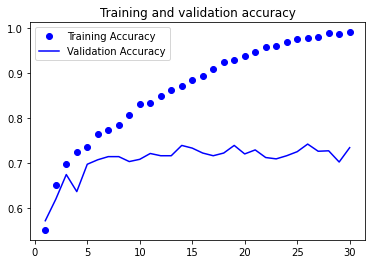

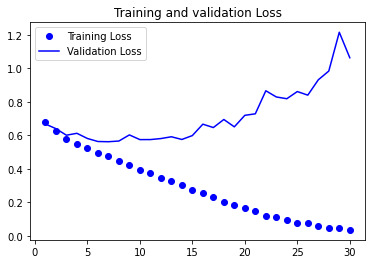

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the results, it appears that are model is overfitting to the data

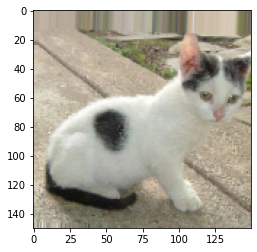

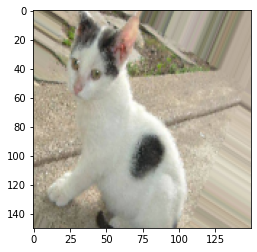

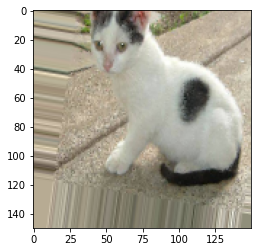

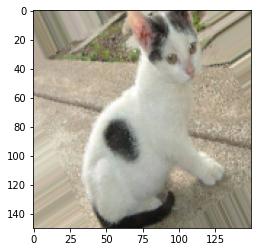

In [0]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

from keras_preprocessing import image
list_of_names = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

image_path = list_of_names[3]
img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size =1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if(i%4 == 0):
    break

plt.show()

    Modifing data generators to help the model generalize data better

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

    Creating a new model with a dropout layer to limit overfitting

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

    Recompile 

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Reset data generators

In [0]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=100, validation_data=validation_gen, validation_steps=50)
model.save('CatsVsDogs_Small_2.h5')
sendmail('Model 2 Done Training')

Epoch 1/100
100/100 [==============================] - 28s 281ms/step - loss: 0.4099 - acc: 0.9195 - val_loss: 0.2892 - val_acc: 0.9020
Epoch 2/100
100/100 [==============================] - 30s 297ms/step - loss: 0.1891 - acc: 0.9285 - val_loss: 0.2182 - val_acc: 0.9330
Epoch 3/100
100/100 [==============================] - 25s 250ms/step - loss: 0.1778 - acc: 0.9365 - val_loss: 0.2335 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 23s 229ms/step - loss: 0.1499 - acc: 0.9430 - val_loss: 0.2051 - val_acc: 0.9290
Epoch 5/100
100/100 [==============================] - 23s 226ms/step - loss: 0.1525 - acc: 0.9445 - val_loss: 0.2690 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 23s 227ms/step - loss: 0.1498 - acc: 0.9420 - val_loss: 0.2970 - val_acc: 0.9330
Epoch 7/100
100/100 [==============================] - 23s 227ms/step - loss: 0.1226 - acc: 0.9575 - val_loss: 0.3845 - val_acc: 0.8990
Epoch 8/100
100/100 [===========================

    Training new model

<Figure size 432x288 with 0 Axes>

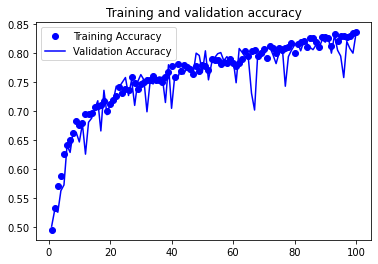

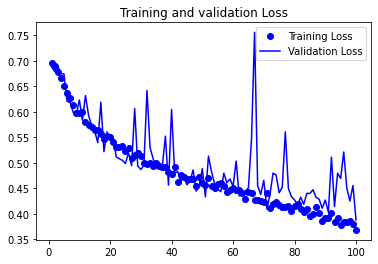

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the new results, appears to be a better model

##Part II: Using VGG16 model

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


    Importing VGG16 model

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

    ##Viewing Model

In [0]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  gen = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')
  
  i = 0
  for inputs_batch, labels_batch in gen:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1) * batch_size] = features_batch
    labels[i * batch_size : (i+1) * batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

    Function to get features for model

In [0]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

sendmail('Done loading')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Running function to load features into runtime

In [0]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))


    Reshaping data into usable array

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5778 - acc: 0.7030 - val_loss: 0.4361 - val_acc: 0.8260
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4330 - acc: 0.8090 - val_loss: 0.3623 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3549 - acc: 0.8495 - val_loss: 0.3300 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3143 - acc: 0.8715 - val_loss: 0.2965 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2905 - acc: 0.8835 - val_loss: 0.2824 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2674 - acc: 0.8910 - val_loss: 0.2760 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2472 - acc: 0.9040 - val_loss: 0.2599 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

    Training Model

<Figure size 432x288 with 0 Axes>

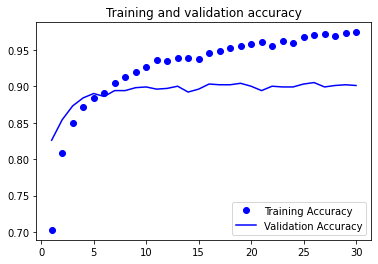

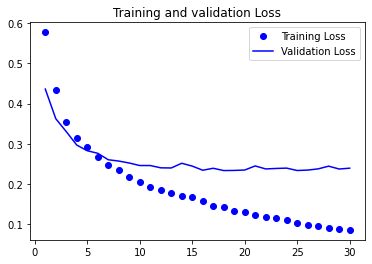

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing results

In [0]:
#feature extraction with data augmentation 
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


    Modifying Model

In [0]:
conv_base.trainable = False

    Freeze parameters for the pre-existing vgg16 model

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_gen = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


    Reloading image generators, helps to prevent over-fitting by modifying images

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [0]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=30, validation_data=validation_gen, validation_steps=50)

sendmail('Model done running')

Epoch 1/30
100/100 [==============================] - 24s 242ms/step - loss: 0.5887 - acc: 0.7045 - val_loss: 0.4402 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 23s 235ms/step - loss: 0.4824 - acc: 0.7830 - val_loss: 0.3660 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 23s 234ms/step - loss: 0.4279 - acc: 0.8190 - val_loss: 0.3341 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3934 - acc: 0.8250 - val_loss: 0.3195 - val_acc: 0.8660
Epoch 5/30
100/100 [==============================] - 23s 230ms/step - loss: 0.3786 - acc: 0.8370 - val_loss: 0.2933 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 23s 234ms/step - loss: 0.3703 - acc: 0.8410 - val_loss: 0.2779 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 23s 233ms/step - loss: 0.3576 - acc: 0.8455 - val_loss: 0.2806 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 2

    Running Model again

<Figure size 432x288 with 0 Axes>

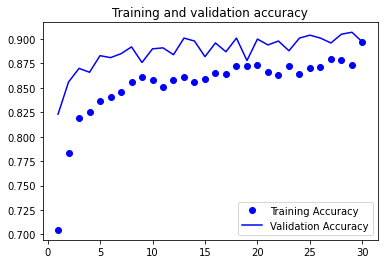

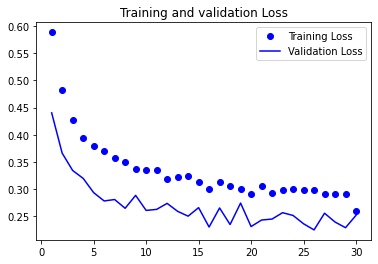

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the new results

In [0]:
conv_base.trainable = True

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

    Freezing all but the last layer

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [0]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=100, validation_data=validation_gen, validation_steps=50)

sendmail('Model done running')

Epoch 1/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1991 - acc: 0.9140 - val_loss: 0.1925 - val_acc: 0.9250
Epoch 2/100
100/100 [==============================] - 24s 240ms/step - loss: 0.1842 - acc: 0.9215 - val_loss: 0.2465 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 24s 241ms/step - loss: 0.1779 - acc: 0.9220 - val_loss: 0.1775 - val_acc: 0.9310
Epoch 4/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1671 - acc: 0.9285 - val_loss: 0.2115 - val_acc: 0.9270
Epoch 5/100
100/100 [==============================] - 24s 242ms/step - loss: 0.1657 - acc: 0.9370 - val_loss: 0.1966 - val_acc: 0.9290
Epoch 6/100
100/100 [==============================] - 24s 241ms/step - loss: 0.1619 - acc: 0.9325 - val_loss: 0.1835 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 24s 243ms/step - loss: 0.1665 - acc: 0.9290 - val_loss: 0.1967 - val_acc: 0.9270
Epoch 8/100
100/100 [===========================

    Running Model again

<Figure size 432x288 with 0 Axes>

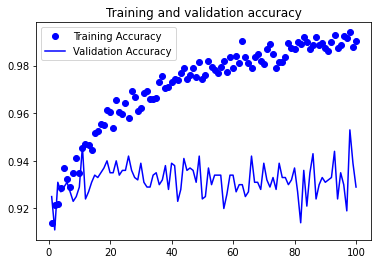

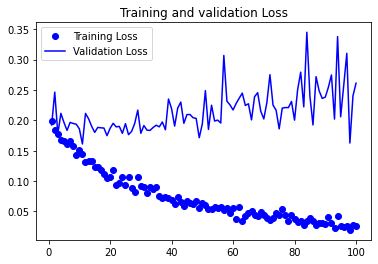

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

    Visualizing the results agian

In [0]:
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_gen, steps=50)
print('Accuracy: ', test_acc)
print('Loss: ', test_loss)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy:  0.9330000281333923
Loss:  0.2552753686904907


    Testing the model

## Part III: Visualizing Neural Networks

In [26]:
#from tensorflow.models import load_model
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.load_model('/content/drive/My Drive/Data/CatsVsDogs_Small_2.h5')

#model = load_model('/content/drive/My Drive/Data/CatsVsDogs_Small_2.h5')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 4,457,473
Non-trainable params: 12,354,880
_________________________________________________________________


In [0]:
img_path = '/content/drive/My Drive/Data/CatsVsDogs_Small/test/cats/cat.1700.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.0

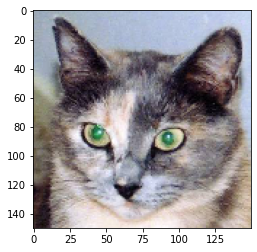

In [28]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [33]:
from tensorflow.keras import models

layer_out = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_out)

ValueError: ignored

In [15]:
activations = activation_model.predict(img_tensor)

first_layer_activations = activations[0]

print(activations)

NameError: ignored

In [17]:
plt.matshow(first_layer_activations[0, :, :, 4], cmap='viridis')

NameError: ignored

In [20]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col*images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image

  scale = 1.0 / size
  plt.figure(figsize=(scale*display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect = 'auto', cmap='viridis')

NameError: ignored